# STEP 1: SETUP AND LOAD THE DATA
Install libraries

In [1]:
!pip install pandas numpy seaborn matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# STEP 2: LOAD THE DATASET
Import CSV file

In [2]:
df = pd.read_csv(r'C:\Users\Nikita\Downloads\Python_Diwali_Sales_Analysis-main (1)\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding= 'unicode_escape')  #for error we use unicode_escape it is optional

# STEP 3: UNDERSTAND THE DATASET





In [4]:
#display the first few rows
print(df.head())
#get information about the dataset 
print(df.info())
#get descriptive statistics
print(df.describe())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

# STEP 4: DATA CLEANING AND PROCESSING
#checking for missing value

In [10]:
pd.isnull(df)  # give true and false value
pd.isnull(df).sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
Status              0
unnamed1            0
dtype: int64

In [11]:
# drop null values (delete null value)
df.dropna(inplace=True)

In [ ]:
#initialize list of lists
data_test = [['madhav',11],['Gopi',15],['Keshav', ],['Lalita',16]]
#create the pandas dataframe using list
df_test = pd.DataFrame(data_test,columns=['Name','Age'])
df_test

In [ ]:
# change data type #for remove float 
df['Amount'] = df['Amount'].astype('int') #(for change data type use function astype)
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})  
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

# STEP 5: EXPLORATORY DATA ANALYSIS


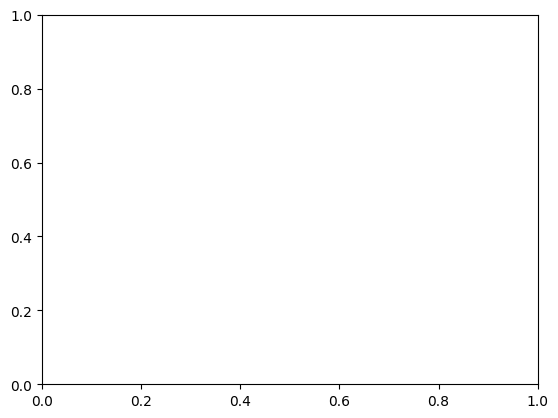

In [12]:
df.columns
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

# 1. Gender
# plotting a bar chart for gender vs total amount





<Axes: >

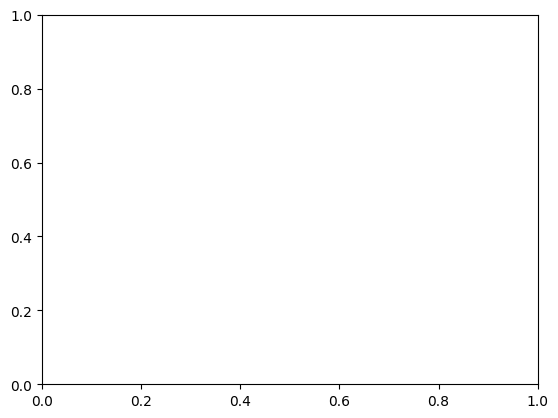

In [13]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

# 2. AGE


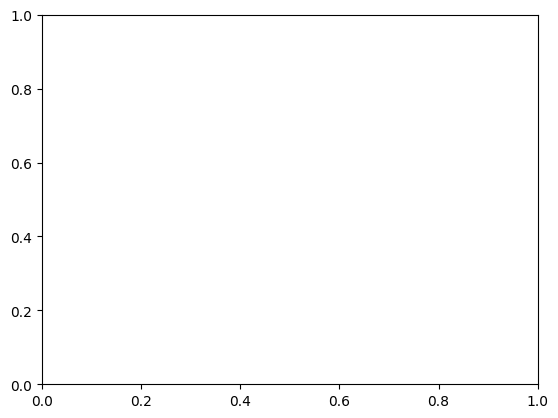

In [14]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

# 3.STATE
# total number of orders from top 10 states



<Axes: >

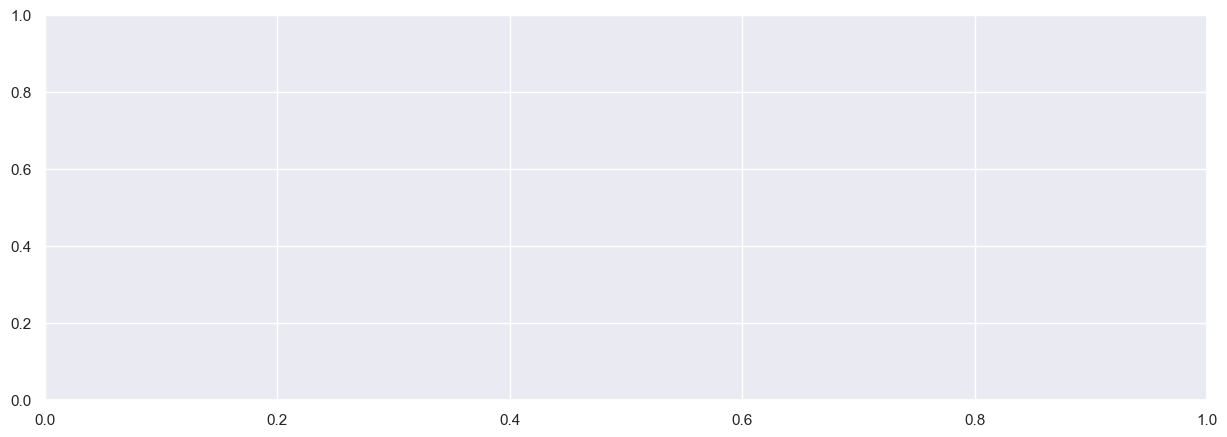

In [15]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

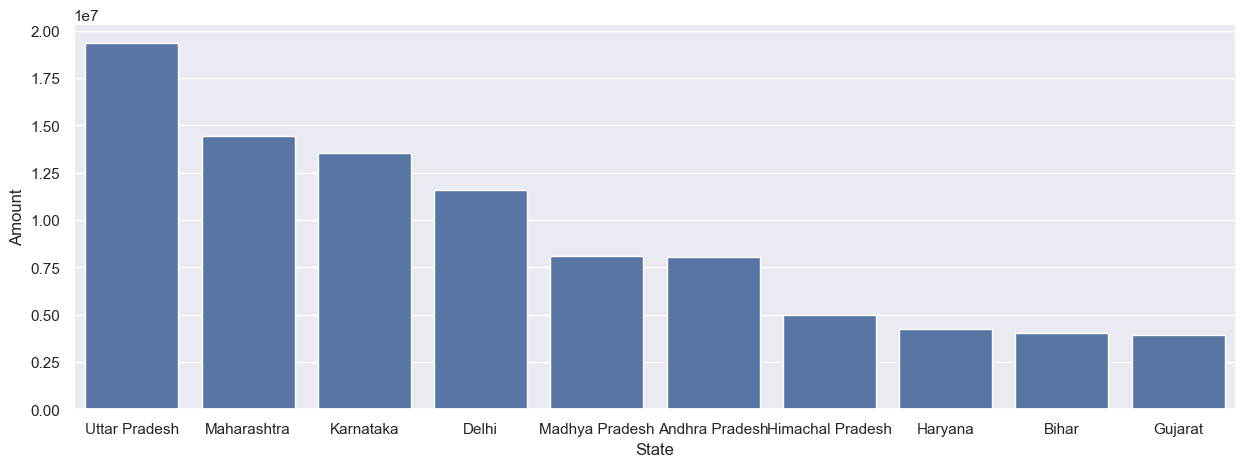

In [9]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

# 4. MARITAL STATUS


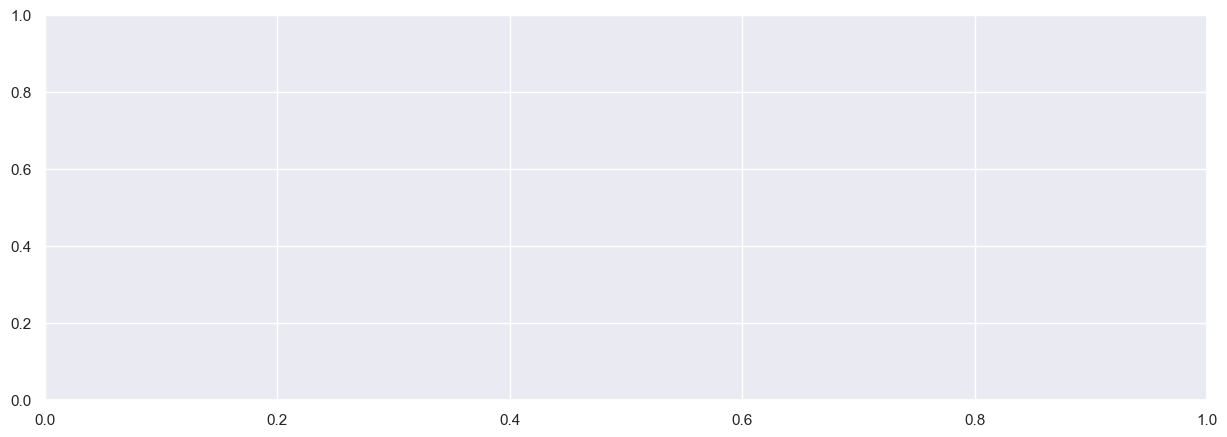

In [16]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: >

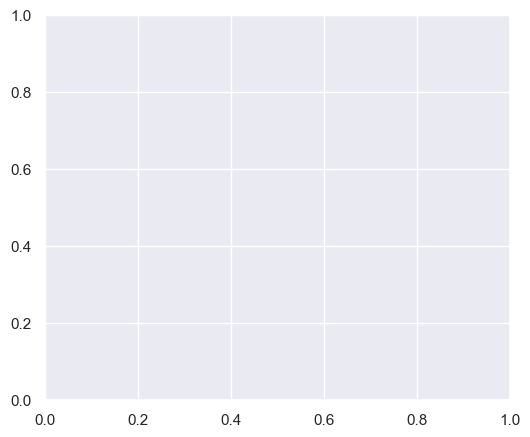

In [17]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

# 5. OCCUPATION


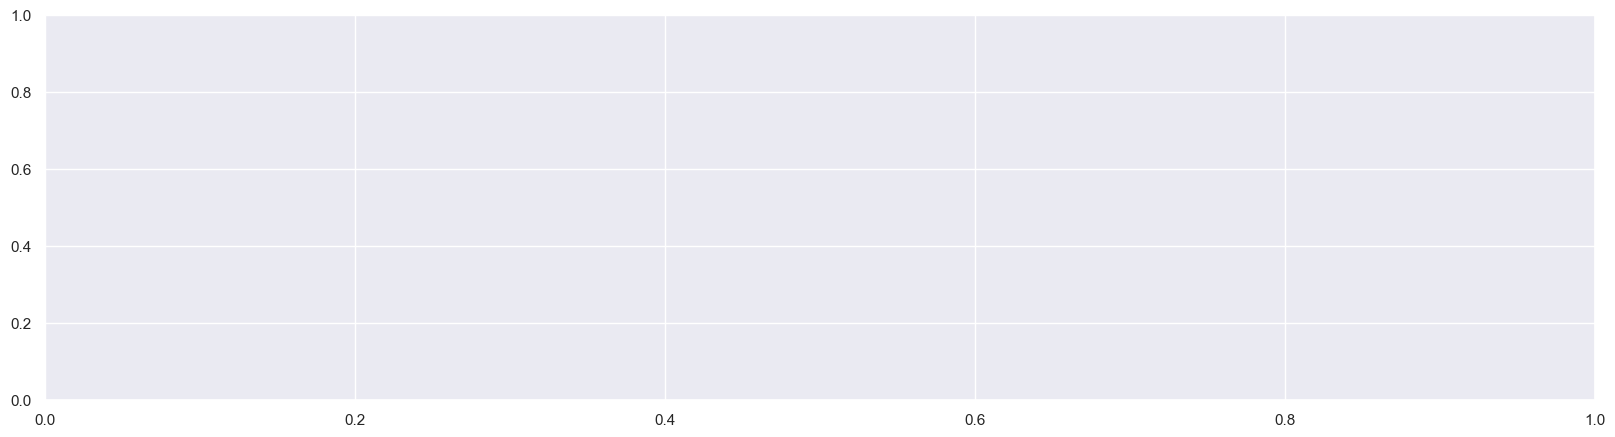

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

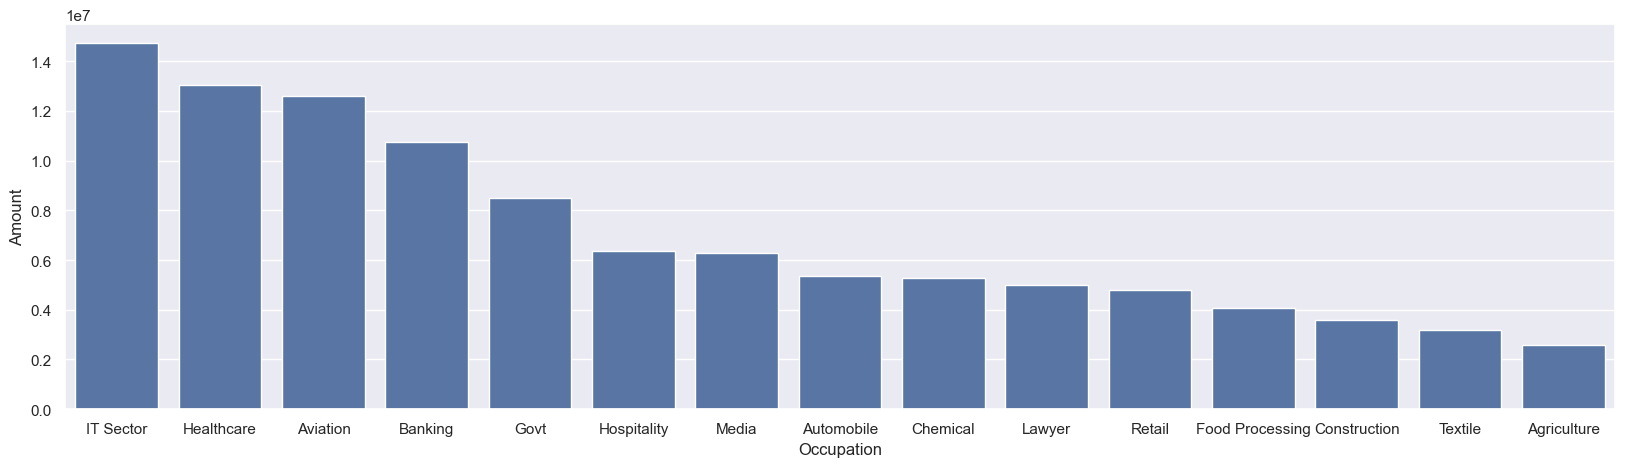

In [13]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

# 6. PRODUCT CATEGORY


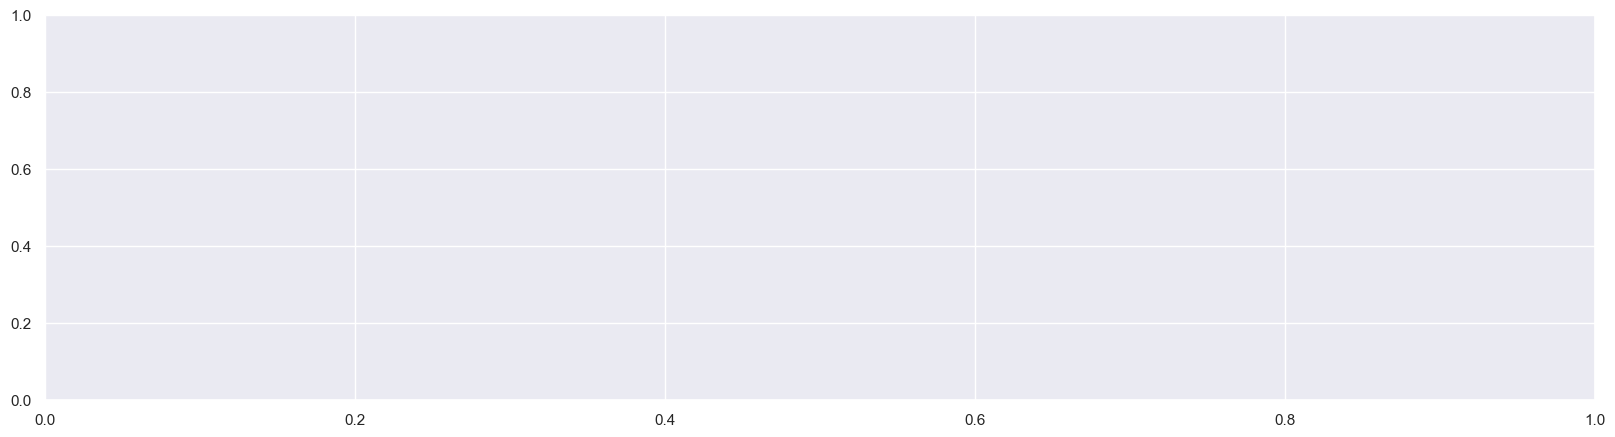

In [19]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')


In [ ]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# STEP 6: CONCLUSION 
# Married women age group 26-35 yrs from up,mahrastra and karnatka working IT, Healthcare.
# And Aviation are more likely tp buy product from food, clothing and Electronics category.

# STEP 7: DOCUMENTATION
# Objective: Analyze the factors affecting survival on the Titanic.
# Tools Used: Python, Pandas, Seaborn, Matplotlib
# Key Observations:
# A substantial portion of first-class passengers survived.
# The age of passengers played an important role in survival; younger individuals had a higher survival rate.
# Gender also positively correlated with survival, with a higher number of female survivors.